<a href="https://colab.research.google.com/github/Thcataclismo/Bootcamp-analista-de-Machine-learn-IGTI-XPE-/blob/main/Trabalho_Pr%C3%A1tico_M%C3%B3dulo_4_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Prático - Módulo 4 - Machine Learning

Objetivo:

1.   Análise exploratória dos dados (EDA - Exploratory Data Analysis)
2.   Preparação dos dados.
3.   Comparação e ajuste de modelos de classificação.








In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


In [2]:
# Fashion MNIST Dataset
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
# Carregando a base de dados que retorna quatro NumPy arrays
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Explore os dados

In [6]:
print(f'train images: {len(train_images)} \ntest images:  {len(test_images)}')

train images: 60000 
test images:  10000


In [7]:
# conjunto de treinamento, e cada imagem é representada em 28 x 28 pixels
train_images.shape

(60000, 28, 28)

In [8]:
# Cada label é um inteiro entre 0 e 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
# Todas as labels
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Pré-processe os dados

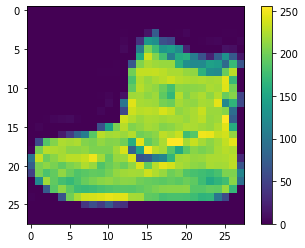

In [10]:
# Primeira imagem do conjunto de dados
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
# Escalaremos esses valores no intervalo de 0 e 1 antes antes de alimentar o modelo da rede neural.
train_images = train_images / 255.0

test_images = test_images / 255.0

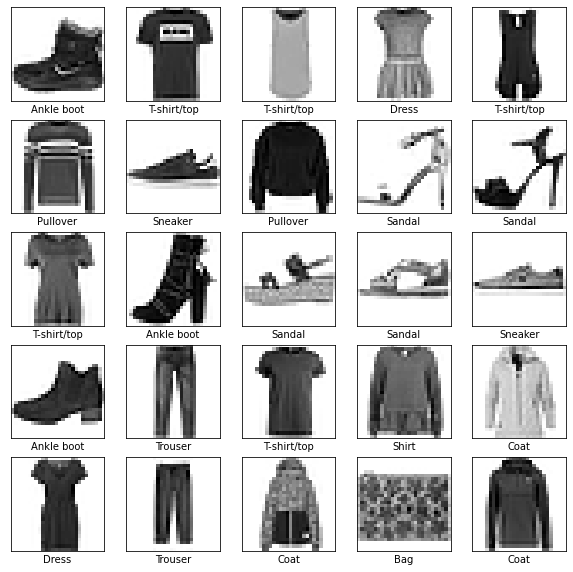

In [12]:
# Primeiras 25 imagens do conjunto de treinamento
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Construindo o modelo


In [13]:
# Montar as camadas
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
# Compile o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Treine o modelo

In [16]:
# Treine o modelo com o método fit
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4966 - accuracy: 0.8258
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3785 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3407 - accuracy: 0.8754
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3172 - accuracy: 0.8831
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2977 - accuracy: 0.8898
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2827 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2712 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2594 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2501 - accuracy: 0.9058
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.24

Avalie a acurácia

In [17]:
# compare como o modelo performou com o conjunto de teste
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3546 - accuracy: 0.8731 - 727ms/epoch - 2ms/step

Test accuracy: 0.8730999827384949


Faça predições

In [18]:
# Para predições de algumas imagens
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [19]:
# Primeira pedição do conjunto. A predição é um array de 10 números
predictions[0]

array([1.3629902e-09, 2.0479245e-10, 6.1906258e-09, 3.9887525e-12,
       8.9567349e-09, 5.3317443e-04, 1.6754053e-07, 4.8025926e-03,
       1.0750379e-06, 9.9466300e-01], dtype=float32)

In [20]:
# Podemos ver cada label tem um maior valor de confiança.
# Então, o modelo é confiante de que essa imagem é uma bota (ankle boot) ou class_names[9]
np.argmax(predictions[0])
     

9

In [21]:
# Examinando a label do teste, vemos que essa classificação é correta
test_labels[0]

9

In [22]:
# Podemos mostrar graficamente como se parece em um conjunto total de previsão de 10 classes.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

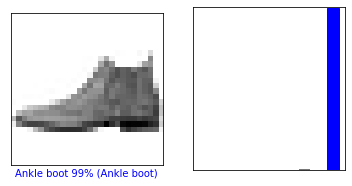

In [23]:
# Vamos olhar a previsão imagem na posição 0, do array de predição.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

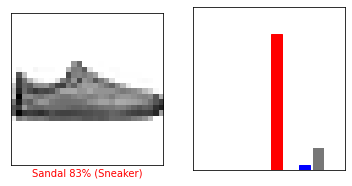

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

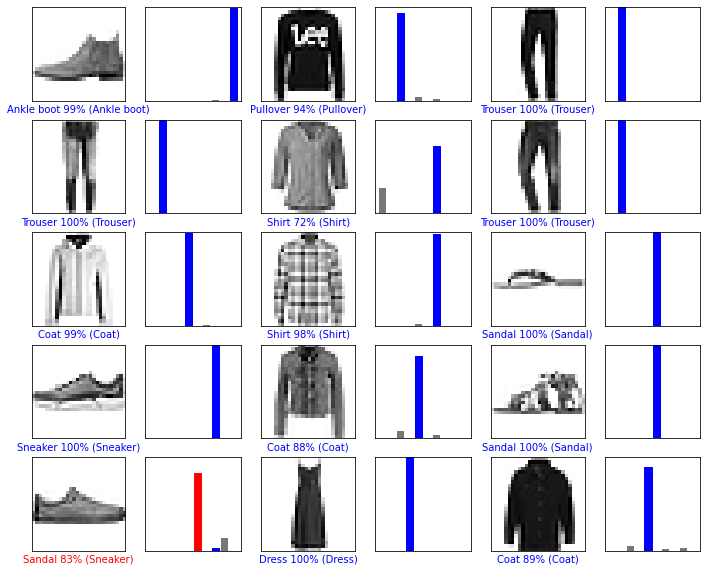

In [25]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [26]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


In [27]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[1.3629902e-09 2.0479206e-10 6.1906258e-09 3.9887447e-12 8.9567349e-09
  5.3317472e-04 1.6754053e-07 4.8025926e-03 1.0750409e-06 9.9466300e-01]]


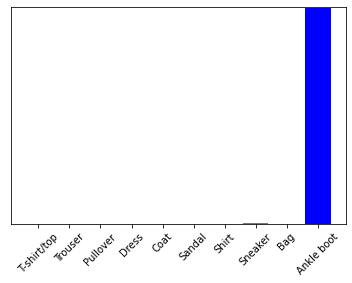

In [30]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
np.argmax(predictions_single[0])

9